In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Creating your first graph and running it in a Session

In [2]:
import tensorflow as tf
x = tf.Variable(2, name = 'x')
y = tf.Variable(3, name = 'y')
f = x * x * y + y + 2
f

<tf.Tensor: id=23, shape=(), dtype=int32, numpy=17>

This code does not perform any computations, it just creates a graph. To evaluate this graph, you need to open a TensorFlow <i>Session</i>, use it to intialize variables and evaluate <code>f</code> 

# Linear Regression with TensorFlow

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 42)

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
class LinearRegression(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y):
        m, n = X.shape
        X = np.c_[X, np.ones(m)]
        X = tf.constant(X, dtype = tf.float32, name = 'X')
        y = tf.constant(y[:,None], dtype = tf.float32, name = 'y')
        XT = tf.transpose(X)
        W = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)
        W = W.numpy()
        self.coef_, self.intercept_ = W[:-1], W[-1]
        return self
    def predict(self, X):
        return X @ self.coef_ + self.intercept_

In [5]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
mean_squared_error(y_pred, y_test)

22.098888790053884

# Implementing Gradient Descent

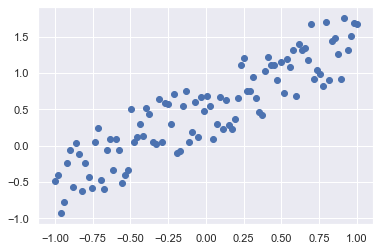

In [7]:
np.random.seed(101)
N = 100
X = np.linspace(-1, 1, N)
y = X + np.random.rand(N)
plt.scatter(X, y)

In [8]:
class LinearRegressionGD(BaseEstimator, TransformerMixin):
    def __init__(self, max_iter = 1000 , learning_rate = 0.001, alpha = 1):
        self.max_iter = max_iter
        self.alpha = alpha
        self.learning_rate = learning_rate
    def fit(self, X, y):
        m, n = X.shape
        X = tf.constant(np.c_[X, np.ones(m)], dtype = tf.float32, name = 'X')
        y = tf.constant(y[:,None], dtype = tf.float32, name = 'y')
        theta = tf.Variable(np.random.uniform(size = (n + 1, 1)), dtype = tf.float32, name = 'theta')
        
        for i in range(self.max_iter):
            y_ = tf.matmul(X, theta)
            residual = y_ - y
            cost = tf.reduce_mean(tf.square(residual)) / (2 * m)
            gradient = tf.matmul(tf.transpose(X), residual)
            theta.assign(theta - self.learning_rate * gradient)
            print('Epoch {}: {}'.format(i + 1, cost))
        theta = theta.numpy().ravel()
        self.coef_ = theta[:-1]
        self.intercept_ = theta[-1]
        return self

    def predict(self, X):
        return X @ self.coef_ + self.intercept_
            
            

In [9]:
reg = LinearRegressionGD(learning_rate=.01)
reg.fit(X[:,None], y)


Epoch 1: 0.0006677834899164736
Epoch 2: 0.00046560983173549175
Epoch 3: 0.0004280927823856473
Epoch 4: 0.00041175365913659334
Epoch 5: 0.00040463783079758286
Epoch 6: 0.0004015387676190585
Epoch 7: 0.0004001891356892884
Epoch 8: 0.00039960129652172327
Epoch 9: 0.00039934535743668675
Epoch 10: 0.0003992338024545461
Epoch 11: 0.00039918525726534426
Epoch 12: 0.0003991641860920936
Epoch 13: 0.0003991549019701779
Epoch 14: 0.00039915097295306623
Epoch 15: 0.0003991491685155779
Epoch 16: 0.0003991484409198165
Epoch 17: 0.000399148091673851
Epoch 18: 0.00039914791705086827
Epoch 19: 0.0003991478297393769
Epoch 20: 0.00039914785884320736
Epoch 21: 0.00039914780063554645
Epoch 22: 0.0003991478297393769
Epoch 23: 0.0003991478297393769
Epoch 24: 0.0003991478297393769
Epoch 25: 0.0003991478297393769
Epoch 26: 0.0003991478297393769
Epoch 27: 0.0003991478297393769
Epoch 28: 0.00039914780063554645
Epoch 29: 0.0003991478297393769
Epoch 30: 0.0003991478297393769
Epoch 31: 0.0003991478297393769
Epoch 3

Epoch 288: 0.0003991478297393769
Epoch 289: 0.0003991478297393769
Epoch 290: 0.0003991478297393769
Epoch 291: 0.0003991478297393769
Epoch 292: 0.0003991478297393769
Epoch 293: 0.0003991478297393769
Epoch 294: 0.0003991478297393769
Epoch 295: 0.0003991478297393769
Epoch 296: 0.0003991478297393769
Epoch 297: 0.0003991478297393769
Epoch 298: 0.0003991478297393769
Epoch 299: 0.0003991478297393769
Epoch 300: 0.0003991478297393769
Epoch 301: 0.0003991478297393769
Epoch 302: 0.0003991478297393769
Epoch 303: 0.0003991478297393769
Epoch 304: 0.0003991478297393769
Epoch 305: 0.0003991478297393769
Epoch 306: 0.0003991478297393769
Epoch 307: 0.0003991478297393769
Epoch 308: 0.0003991478297393769
Epoch 309: 0.0003991478297393769
Epoch 310: 0.0003991478297393769
Epoch 311: 0.0003991478297393769
Epoch 312: 0.0003991478297393769
Epoch 313: 0.0003991478297393769
Epoch 314: 0.0003991478297393769
Epoch 315: 0.0003991478297393769
Epoch 316: 0.0003991478297393769
Epoch 317: 0.0003991478297393769
Epoch 318:

Epoch 736: 0.0003991478297393769
Epoch 737: 0.0003991478297393769
Epoch 738: 0.0003991478297393769
Epoch 739: 0.0003991478297393769
Epoch 740: 0.0003991478297393769
Epoch 741: 0.0003991478297393769
Epoch 742: 0.0003991478297393769
Epoch 743: 0.0003991478297393769
Epoch 744: 0.0003991478297393769
Epoch 745: 0.0003991478297393769
Epoch 746: 0.0003991478297393769
Epoch 747: 0.0003991478297393769
Epoch 748: 0.0003991478297393769
Epoch 749: 0.0003991478297393769
Epoch 750: 0.0003991478297393769
Epoch 751: 0.0003991478297393769
Epoch 752: 0.0003991478297393769
Epoch 753: 0.0003991478297393769
Epoch 754: 0.0003991478297393769
Epoch 755: 0.0003991478297393769
Epoch 756: 0.0003991478297393769
Epoch 757: 0.0003991478297393769
Epoch 758: 0.0003991478297393769
Epoch 759: 0.0003991478297393769
Epoch 760: 0.0003991478297393769
Epoch 761: 0.0003991478297393769
Epoch 762: 0.0003991478297393769
Epoch 763: 0.0003991478297393769
Epoch 764: 0.0003991478297393769
Epoch 765: 0.0003991478297393769
Epoch 766:

LinearRegressionGD(alpha=1, learning_rate=0.01, max_iter=1000)

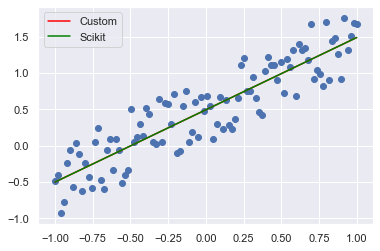

In [10]:
from sklearn.linear_model import LinearRegression as lr
y_pred = reg.predict(X[:,None])
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'red', label = 'Custom')
y_pred1 = lr().fit(X[:,None], y).predict(X[:,None])
plt.plot(X, y_pred1, color = 'green', label = 'Scikit')
plt.legend()

## Using autodiff

simply replace <code>gradient = gradients(cost, [theta])</code>

In [49]:
from tensorflow import gradients
from sklearn.base import BaseEstimator, TransformerMixin
import tensorflow as tf

class LinearRegressionAutodiff(BaseEstimator, TransformerMixin):
    def __init__(self, max_iter = 1000, learning_rate = 0.01):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
    def fit(self, X, y):
        m, n = X.shape
        X = tf.constant(np.c_[X, np.ones(m)], dtype = tf.float32, name = 'X')
        y = tf.constant(y[:,None], dtype = tf.float32, name = 'y')
        theta = tf.Variable(np.random.uniform(size = (n + 1,1)), dtype = tf.float32, name = 'theta')
        for _ in range(self.max_iter):
            
            
           
            with tf.GradientTape() as g:
                y_ = tf.matmul(X, theta)
                residual = y_ - y
                mse = 1 / (2 * m) * tf.reduce_mean(tf.square(residual))
                g.watch(theta)
                gradient = g.gradient(mse, theta)
                
            theta.assign(theta - self.learning_rate * gradient)
            print('epoch {}: {}'.format(_ + 1, mse))
        theta = theta.numpy().ravel()
        self.coef_ = theta[:-1]
        self.intercept_ = theta[-1]
        return self
    def predict(self, X):
        return self.coef_ @ X + self.intercept_
    

        

In [50]:
ref_autodiff = LinearRegressionAutodiff()
ref_autodiff.fit(X[:, None], y)

epoch 1: 0.0011516946833580732
epoch 2: 0.0011516259983181953
epoch 3: 0.0011515571968629956
epoch 4: 0.0011514885118231177
epoch 5: 0.0011514199431985617
epoch 6: 0.0011513512581586838
epoch 7: 0.0011512826895341277
epoch 8: 0.0011512140044942498
epoch 9: 0.0011511454358696938
epoch 10: 0.001151076634414494
epoch 11: 0.0011510081822052598
epoch 12: 0.00115093938075006
epoch 13: 0.0011508706957101822
epoch 14: 0.0011508021270856261
epoch 15: 0.00115073355846107
epoch 16: 0.001150664989836514
epoch 17: 0.001150596421211958
epoch 18: 0.00115052773617208
epoch 19: 0.0011504592839628458
epoch 20: 0.001150390598922968
epoch 21: 0.0011503221467137337
epoch 22: 0.0011502535780891776
epoch 23: 0.0011501850094646215
epoch 24: 0.0011501163244247437
epoch 25: 0.0011500478722155094
epoch 26: 0.001149979536421597
epoch 27: 0.001149910967797041
epoch 28: 0.001149842282757163
epoch 29: 0.0011497738305479288
epoch 30: 0.0011497053783386946
epoch 31: 0.0011496368097141385
epoch 32: 0.001149568473920226

epoch 379: 0.0011262932093814015
epoch 380: 0.0011262275511398911
epoch 381: 0.0011261618928983808
epoch 382: 0.0011260962346568704
epoch 383: 0.0011260304600000381
epoch 384: 0.0011259649181738496
epoch 385: 0.0011258992599323392
epoch 386: 0.0011258336016908288
epoch 387: 0.0011257679434493184
epoch 388: 0.0011257024016231298
epoch 389: 0.0011256365105509758
epoch 390: 0.001125571085140109
epoch 391: 0.0011255054268985987
epoch 392: 0.0011254396522417665
epoch 393: 0.0011253741104155779
epoch 394: 0.0011253084521740675
epoch 395: 0.001125242910347879
epoch 396: 0.0011251772521063685
epoch 397: 0.0011251115938648582
epoch 398: 0.0011250461684539914
epoch 399: 0.0011249803937971592
epoch 400: 0.0011249147355556488
epoch 401: 0.0011248491937294602
epoch 402: 0.0011247836519032717
epoch 403: 0.0011247181100770831
epoch 404: 0.0011246524518355727
epoch 405: 0.0011245867935940623
epoch 406: 0.0011245213681831956
epoch 407: 0.0011244557099416852
epoch 408: 0.0011243904009461403
epoch 409: 0

epoch 761: 0.0011017430806532502
epoch 762: 0.0011016800999641418
epoch 763: 0.001101617468520999
epoch 764: 0.0011015544878318906
epoch 765: 0.0011014918563887477
epoch 766: 0.001101429108530283
epoch 767: 0.0011013663606718183
epoch 768: 0.0011013034963980317
epoch 769: 0.0011012408649548888
epoch 770: 0.0011011780006811023
epoch 771: 0.0011011153692379594
epoch 772: 0.0011010525049641728
epoch 773: 0.00110098987352103
epoch 774: 0.0011009270092472434
epoch 775: 0.0011008644942194223
epoch 776: 0.0011008016299456358
epoch 777: 0.001100738882087171
epoch 778: 0.0011006761342287064
epoch 779: 0.0011006135027855635
epoch 780: 0.0011005507549270988
epoch 781: 0.001100488007068634
epoch 782: 0.0011004252592101693
epoch 783: 0.0011003626277670264
epoch 784: 0.0011002997634932399
epoch 785: 0.0011002372484654188
epoch 786: 0.001100174500606954
epoch 787: 0.0011001118691638112
epoch 788: 0.0011000490048900247
epoch 789: 0.0010999863734468818
epoch 790: 0.0010999237420037389
epoch 791: 0.0010

LinearRegressionAutodiff(learning_rate=0.01, max_iter=1000)

In [58]:
!pip install tensorflow-gpu

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\dell\\Anaconda3\\Lib\\site-packages\\tensorflow_core\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



The first layer of the <code>Sequential</code> model needs to receive information about its input shape (and only the first because the following layers can do automatic shape inference)